In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
file_path = r"C:\Users\rk\OneDrive\Desktop\Smart Band\Smartphone Human Fall Dataset\Train.csv"
df = pd.read_csv(file_path)
print("Dataset Overview:")
df.head()

Dataset Overview:


,Unnamed: 0,acc_max,gyro_max,acc_kurtosis,gyro_kurtosis,label,lin_max,acc_skewness,gyro_skewness,post_gyro_max,post_lin_max,fall
0,661,26.039919,7.309797,20.378162,2.782476,SDL,11.131080,3.891361,1.592927,7.086618,10.790400,1
1,122,25.864500,6.511954,14.187190,5.324864,FOL,7.945561,3.022175,2.376939,6.325522,7.719352,1
2,113,27.524501,12.944099,31.855926,22.891186,FOL,14.454818,4.849024,4.283890,12.888111,14.368784,1
3,14,30.647705,11.694868,23.608764,9.287735,FOL,15.228303,3.921537,2.794609,11.549971,14.944151,1
4,529,26.373917,11.168424,14.318453,15.983202,FKL,10.007396,3.087975,3.363557,11.057636,9.753058,1


In [9]:
X = df.drop(columns=["fall", "label", "Unnamed: 0"])  
y = df["fall"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Training the Random Forest model...\n")
model.fit(X_train, y_train)

Training the Random Forest model...



RandomForestClassifier(random_state=42)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       170
           1       0.98      0.97      0.97       116

    accuracy                           0.98       286
   macro avg       0.98      0.98      0.98       286
weighted avg       0.98      0.98      0.98       286



C:\Users\rk\AppData\Local\Temp\ipykernel_14464\2256422544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")


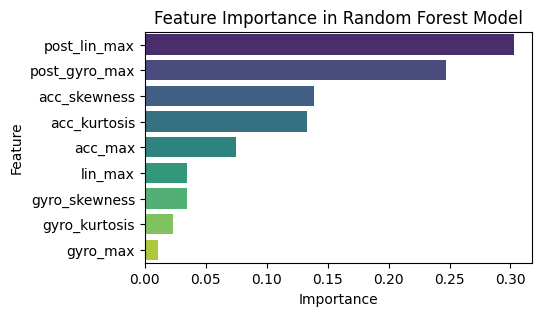

In [29]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(5, 3))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()


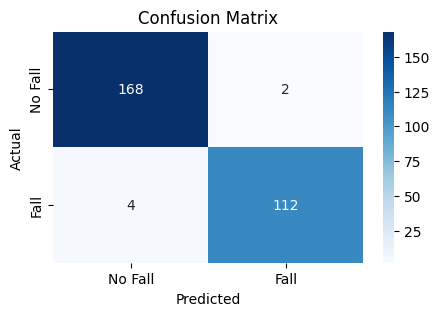

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [33]:
def predict_fall(user_input):
    """Takes a dictionary of user inputs, converts to DataFrame, and predicts fall."""
    input_df = pd.DataFrame([user_input])
    prediction = clf.predict(input_df)[0]
    result = "Fall detected" if prediction == 1 else "No fall detected"
    return result


user_example = {col: float(input(f"Enter value for {col}: ")) for col in X.columns}
prediction_result = predict_fall(user_example)
print("Prediction:", prediction_result)


Prediction: Fall detected
